    
# Perform EDA on North Carolina Crime Rate Dataset (Part I)

## **Data Description:** 

The dataset contains the data for **crime rate in the state of North Carolina**  aggregated by county.

## **Data Attributes:**

1. county - county identifier
2. year - 1987
3. crmrte - crimes committed per person
4. prbarr - 'probability' of arrest
5. prbconv - 'probability' of conviction
6. prbpris - 'probability' of prison sentence
7. avgsen - avg. sentence, days
8. polpc - police per capita
9. density - people per sq. mile
10. taxpc - tax revenue per capita
11. west - =1 if in western N.C.
12. central - =1 if in central N.C.
13. urban - =1 if in SMSA
14. pctmin80 - perc. minority, 1980
15. wcon - weekly wage, construction
16. wtuc - wkly wge, trns, util, commun
17. wtrd - wkly wge, whlesle, retail trade
18. wfir - wkly wge, fin, ins, real est
19. wser - wkly wge, service industry
20. wmfg - wkly wge, manufacturing
21. wfed - wkly wge, fed employees
22. wsta - wkly wge, state employees
23. wloc - wkly wge, local gov emps
24. mix - offense mix: face-to-face/other
25. pctymle - percent young male    

## Objective:

1. To do a **univariate** and **bivariate exploratory analysis** of data and report the findings. <br/>
2. To develop a suitable **linear model with crmrte as the dependent variable** and explain the various aspects of the model. 

## 1. Load Data

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load haberman.csv into a pandas dataFrame.
crimeData = pd.read_csv("crime_v2.csv")
    
# (Q) how many data-points and features?
print (crimeData.shape)

# See the input data.
crimeData.head(5)
# Identified the columns doesnt have header information.

(91, 25)


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0,1,87,0.035604,0.298270,0.527596,0.436170,6.71,0.001828,2.422633,30.993681,...,408.724487,221.270065,453.172211,274.177460,334.540008,477.579987,292.089996,311.910004,0.080169,0.077871
1,3,87,0.015253,0.132029,1.481480,0.450000,6.35,0.000746,1.046332,26.892078,...,376.254181,196.010101,258.564972,192.307693,300.380005,409.829987,362.959992,301.470001,0.030227,0.082607
2,5,87,0.012960,0.444444,0.267857,0.600000,6.76,0.001234,0.412766,34.816051,...,372.208435,229.320892,305.944061,209.697220,237.649994,358.980011,331.529999,281.369995,0.465116,0.072115
3,7,87,0.026753,0.364760,0.525424,0.435484,7.14,0.001530,0.491557,42.947586,...,397.690125,191.172012,281.065094,256.721435,281.799988,412.149994,328.269989,299.029999,0.273622,0.073537
4,9,87,0.010623,0.518219,0.476563,0.442623,8.22,0.000860,0.546948,28.054739,...,377.312561,206.821487,289.312469,215.193329,290.890015,377.350006,367.230011,342.820007,0.060086,0.070698


# 2. Data Analysis & Data Cleaning

In [3]:

# Check characteristics of data.
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 25 columns):
county      91 non-null int64
year        91 non-null int64
crmrte      91 non-null float64
prbarr      91 non-null float64
prbconv     91 non-null float64
prbpris     91 non-null float64
avgsen      91 non-null float64
polpc       91 non-null float64
density     91 non-null float64
taxpc       91 non-null float64
west        91 non-null int64
central     91 non-null int64
urban       91 non-null int64
pctmin80    91 non-null float64
wcon        91 non-null float64
wtuc        91 non-null float64
wtrd        91 non-null float64
wfir        91 non-null float64
wser        91 non-null float64
wmfg        91 non-null float64
wfed        91 non-null float64
wsta        91 non-null float64
wloc        91 non-null float64
mix         91 non-null float64
pctymle     91 non-null float64
dtypes: float64(20), int64(5)
memory usage: 17.9 KB


**The last column was getting read as 'object' data. It was found to be due to the special symbol at the last row, last column 0.074198931'.** Removed the special symbol from input csv file, to fix it.

In [4]:
# To find stats of each feature.
crimeData.describe()

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
count,91.000000,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,101.615385,87.0,0.033400,0.294917,0.551279,0.410766,9.646813,0.001702,1.428837,38.055066,...,411.667954,211.552901,322.098207,275.564211,335.588683,442.900659,357.521976,312.680769,0.128842,0.083962
std,58.793569,0.0,0.018811,0.136940,0.352243,0.080236,2.846913,0.000987,1.514481,13.077918,...,77.266434,34.216065,53.890163,206.251415,87.841262,59.677816,43.103312,28.235279,0.081331,0.023327
min,1.000000,87.0,0.005533,0.092770,0.068376,0.150000,5.380000,0.000746,0.000020,25.692865,...,187.617264,154.209000,170.940170,133.043060,157.410004,326.100006,258.329987,239.169998,0.019608,0.062158
25%,52.000000,87.0,0.020927,0.205679,0.345411,0.364796,7.340000,0.001231,0.547405,30.662366,...,374.632080,190.863731,286.527420,229.661842,288.875000,400.239990,329.324997,297.264999,0.080735,0.074430
50%,105.000000,87.0,0.029986,0.270950,0.452830,0.423423,9.100000,0.001485,0.962264,34.870213,...,406.504059,203.016235,317.307678,253.228058,320.200012,449.839996,357.690002,308.049988,0.101861,0.077713
75%,152.000000,87.0,0.039642,0.344378,0.588859,0.456778,11.420000,0.001877,1.568242,40.948238,...,443.435822,225.125992,345.353668,280.541275,359.580002,478.029999,382.589996,329.250000,0.151749,0.083498
max,197.000000,87.0,0.098966,1.090910,2.121210,0.600000,20.700001,0.009054,8.827652,119.761452,...,613.226074,354.676117,509.465515,2177.068115,646.849976,597.950012,499.589996,388.089996,0.465116,0.248712


It is to be noted that the **maximum value of probability features, prbarr & prbconv, are found to be > 1** which is a data anomaly. The maximum values of prbpris & pctymle are found to be < 1, hence data may be correct.

In [5]:
# To check how many zeros in each column - to find out missing data
print('\n\nNumber of zeroes for each Feature:')
(crimeData==0).sum()




Number of zeroes for each Feature:


county       0
year         0
crmrte       0
prbarr       0
prbconv      0
prbpris      0
avgsen       0
polpc        0
density      0
taxpc        0
west        68
central     57
urban       83
pctmin80     0
wcon         0
wtuc         0
wtrd         0
wfir         0
wser         0
wmfg         0
wfed         0
wsta         0
wloc         0
mix          0
pctymle      0
dtype: int64

There are 91 entries for all the 25 columns. Hence, there is **no missing value in the input dataset. Thus, no need to do data imputation ** or to drop any feature.

The zero values for features, west, central and urban are expected, as the data is inherently boolean. 

In [6]:
# This row has to be dropped because of data anomaly.
crimeData[crimeData['prbarr'] > 1]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
50,115,87,0.005533,1.09091,1.5,0.5,20.700001,0.009054,0.385809,28.193104,...,503.235077,217.490845,342.465759,245.206085,448.420013,442.200012,340.390015,386.119995,0.1,0.072535


In [7]:
# These rows has to be dropped because of data anomaly.
crimeData[crimeData['prbconv'] > 1]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,3,87,0.015253,0.132029,1.48148,0.450000,6.350000,0.000746,1.046332,26.892078,...,376.254181,196.010101,258.564972,192.307693,300.380005,409.829987,362.959992,301.470001,0.030227,0.082607
9,19,87,0.022157,0.162860,1.22561,0.333333,10.340000,0.002024,0.576744,61.152512,...,613.226074,191.245224,290.514099,266.093414,567.059998,403.149994,258.329987,299.440002,0.053347,0.077132
43,99,87,0.017187,0.153846,1.23438,0.556962,14.750000,0.001859,0.547862,39.573483,...,417.209900,168.269226,301.573425,247.629089,258.989990,442.760010,387.019989,291.440002,0.019608,0.128947
50,115,87,0.005533,1.090910,1.50000,0.500000,20.700001,0.009054,0.385809,28.193104,...,503.235077,217.490845,342.465759,245.206085,448.420013,442.200012,340.390015,386.119995,0.100000,0.072535
55,127,87,0.029150,0.179616,1.35814,0.335616,15.990000,0.001583,1.338889,32.023758,...,426.390076,257.600769,441.141296,305.761169,329.869995,508.609985,380.299988,329.709992,0.063055,0.074003
60,137,87,0.012666,0.207143,1.06897,0.322581,6.180000,0.000814,0.316716,44.293674,...,356.125366,170.871139,170.940170,250.836121,192.960007,360.839996,283.899994,321.730011,0.068702,0.070984
66,149,87,0.016499,0.271967,1.01538,0.227273,14.620000,0.001519,0.609244,29.034021,...,437.062927,188.768280,353.218201,210.441483,289.429993,421.339996,342.920013,301.230011,0.116822,0.062158
83,185,87,0.010870,0.195266,2.12121,0.442857,5.380000,0.001222,0.388759,40.824535,...,331.564972,167.372589,264.423065,2177.068115,247.720001,381.329987,367.250000,300.130005,0.049689,0.070082
89,195,87,0.031397,0.201397,1.67052,0.470588,13.020000,0.004459,1.745989,53.666927,...,377.935608,246.061371,411.433014,296.868439,392.269989,480.790008,303.109985,337.279999,0.156124,0.079451
90,197,87,0.014193,0.207595,1.18293,0.360825,12.230000,0.001186,0.889881,25.952581,...,341.880341,182.801987,348.143250,212.820511,322.920013,391.720001,385.649994,306.850006,0.067568,0.074199


In [8]:
# The location cannot be both west and central together.
crimeData[crimeData['west']+crimeData['central'] > 1]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
32,71,87,0.054406,0.243119,0.22959,0.379175,11.29,0.00207,4.834734,31.536579,...,595.371948,240.367325,348.025391,295.230072,358.950012,509.429993,359.109985,339.579987,0.101861,0.07939


**Observations:**

From above analysis, it is found, that **some rows have to be dropped** before doing regression analysis. The probability values of some rows are found to be > 1 and location of one row was found to be both 'west' and 'central' at the same time. We will drop these rows before building the model. The **special character error in the input dataset is also fixed.**


# Univariate Analysis

Univariate visualization   provides summary statistics for each field in the raw data set. It is conducted **to find out how much a single feature in the dataset** would be helpful to determine the target feature, here in this case, crime rate.


## Distribution of Target Variable

Statistics of Crime Rate: 

count    91.000000
mean      0.033400
std       0.018811
min       0.005533
25%       0.020927
50%       0.029986
75%       0.039642
max       0.098966
Name: crmrte, dtype: float64


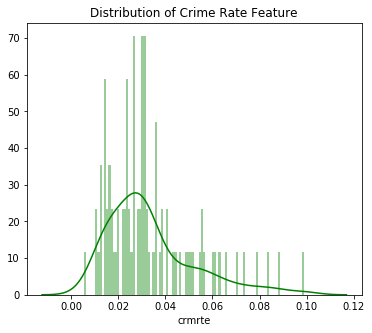

In [44]:
# Numerical data distribution of dependant variable: Crime Rate

print('Statistics of Crime Rate: \n')
print(crimeData['crmrte'].describe())
plt.figure(figsize=(6, 5))
plt.title('Distribution of Crime Rate Feature')
sns.distplot(crimeData['crmrte'], color='g', bins=100, hist_kws={'alpha': 0.4})

## Distribution of All Features

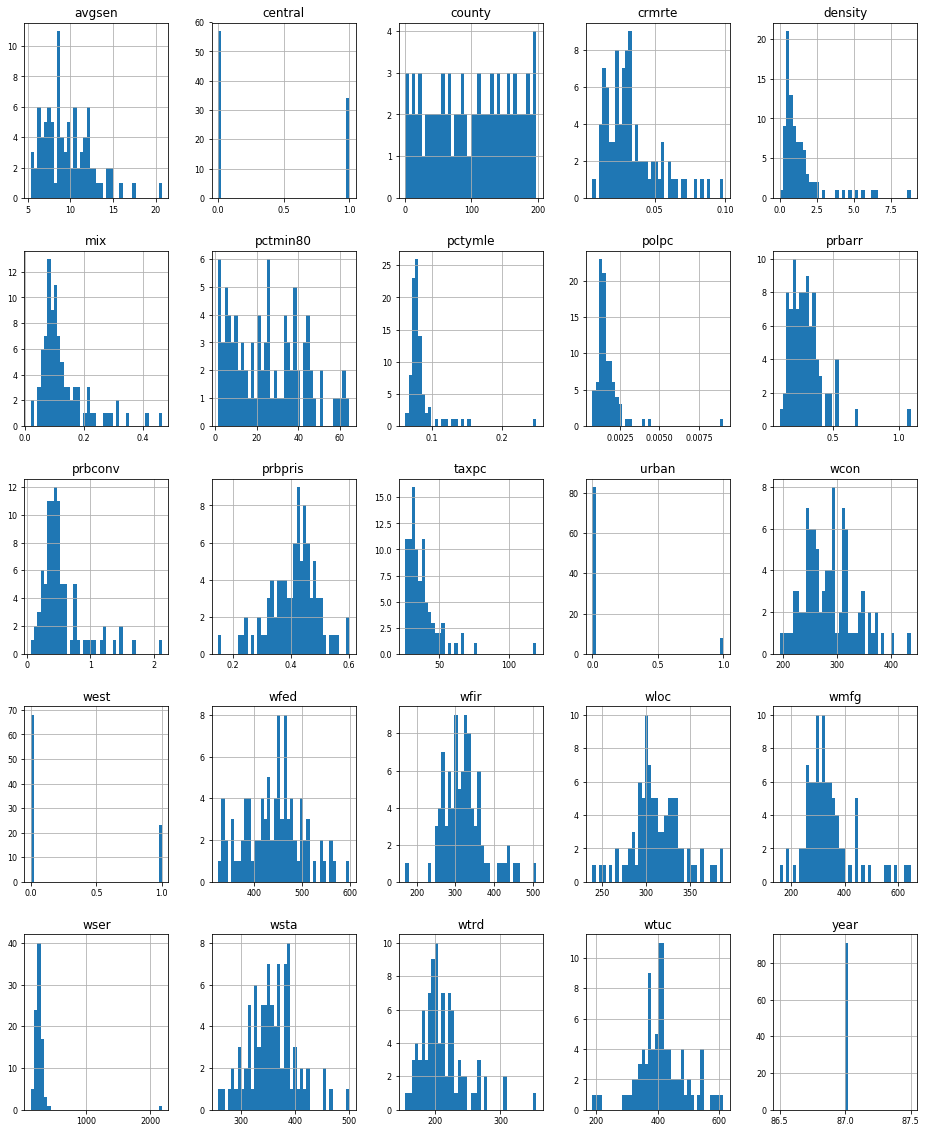

In [45]:
crimeData.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8); 

**Observation:**

The features **density, mix, police per capita, probability of conviction and tax revenue per capita seems to have similar distribution as crime rate.** But no definitive conclusion can be made from this observation. Lets examine further using bivariate analysis.

## Probability/ Cumulative Distribution Function (CDF)

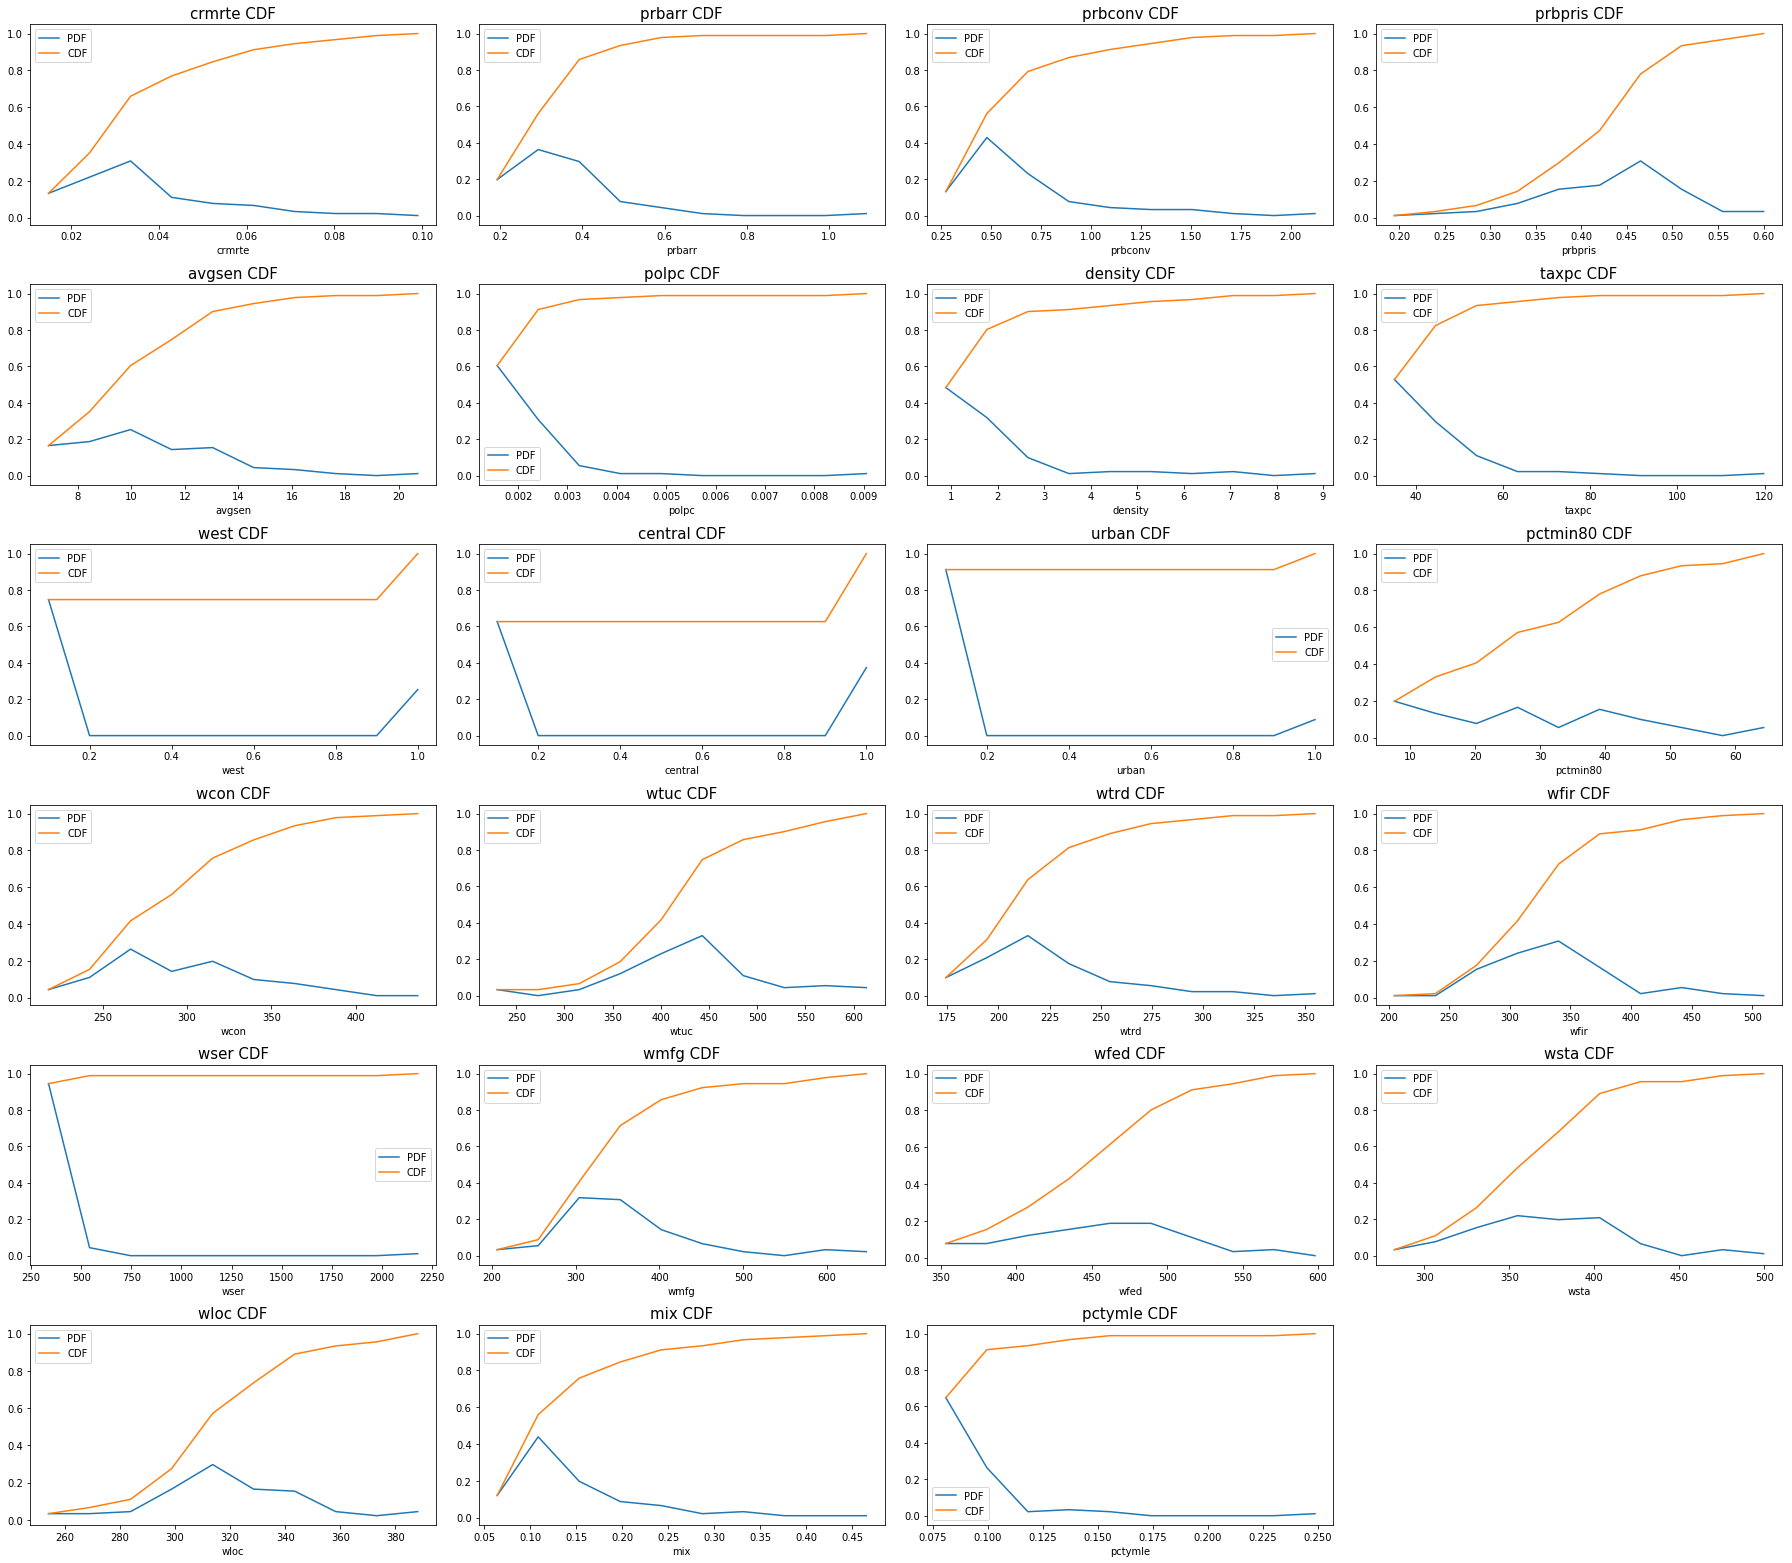

In [46]:

# You can get the percentage directly from CDF given one ‘x’ value. 
# Such information is not available from PDF directly

plt.figure(figsize=(25,25))

for idx, col in enumerate(crimeData.columns[2:]): #excluding county & year
    counts, bin_edges = np.histogram(crimeData[col], bins=10, density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    
    plt.subplot(7, 4, idx+1)
    plt.plot(bin_edges[1:],pdf, label='PDF')
    plt.plot(bin_edges[1:],cdf, label='CDF')
    plt.title(col + " CDF",fontsize=15)
    plt.xlabel(col)
#     plt.ylabel('Probability')
    plt.tight_layout()

    plt.legend()


**Observations:**

a) One **strange observation is in weekly wages of service industry (wser).** More than 95% of wages lies below 400, but the maximum wage is around 2250. 

From the data, this is identified to be **county 185.** As the percentage of minorities in this county is high (nearly 65%) and wages in other sectors are comparatively less, the wages of service industry is mostly an error. **We will remove "county 185" from the input data.**

b) Though the maximum value of tax revenue per capita is 120, more than 50% of values lies below 40.

c) Though the maximum value of police per capita is 0.009, more than 60% of values lies below 0.001. 

# Bivariate Analysis

Bivariate visualization  is performed to find the relationship between each variable in the dataset and the target variable of interest, i.e. crime rate.

The plot of all features against crime rate is done as below.

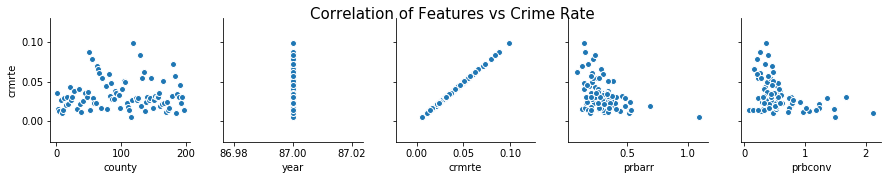

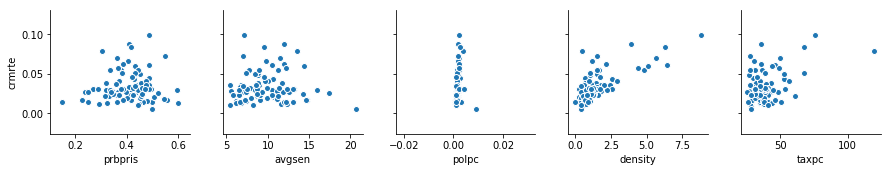

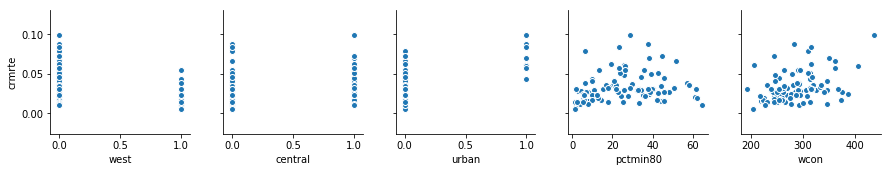

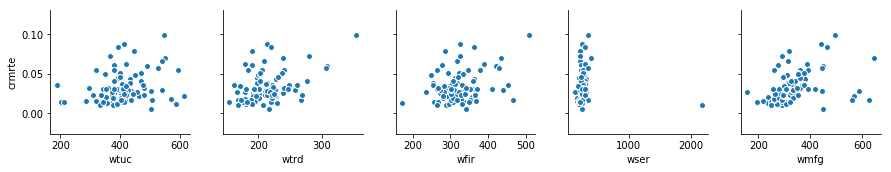

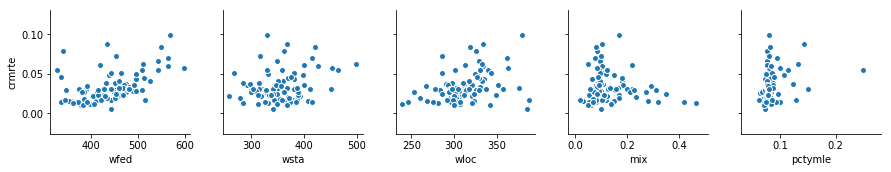

In [47]:
# To plot the correlation of all features against crime rate

for i in range(0, len(crimeData.columns), 5):
    sns.pairplot(data=crimeData,
                x_vars=crimeData.columns[i:i+5],
                y_vars=['crmrte'])
    if i == 0:
        plt.suptitle('Correlation of Features vs Crime Rate', fontsize = 15)

**Observations:**

a) Based on the above pairplot, it can be noted that **density is most positively correlated with crime rate. There is also some correlation with weekly wages under different domains but it needs further investigation, as they are not so pronounced.**

b) Strangely, the **weekly wage features and crime rate is found to be slightly positively correlated. This signifies unequal distribution of income** or probably high unemployment rate. One of the most important features that is not in the given data may be unemployment rate.

Lets try to find if there is any correlation among features for each location: 'west', 'central' & 'urban'.

Number of data points in category: west is 23
Number of data points in category: central is 34
Number of data points in category: urban is 8


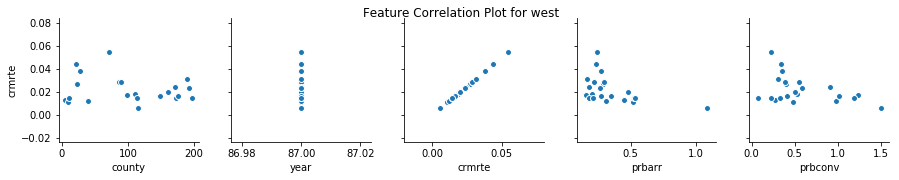

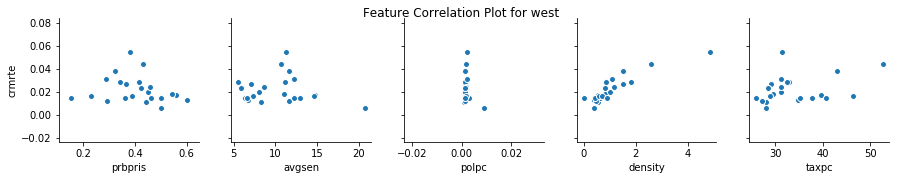

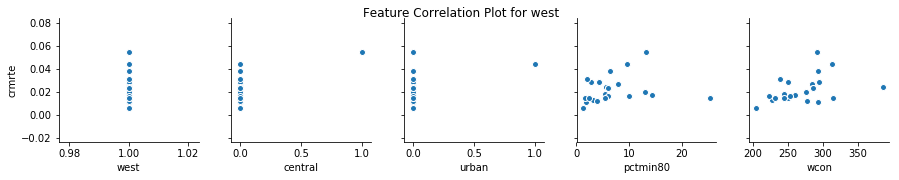

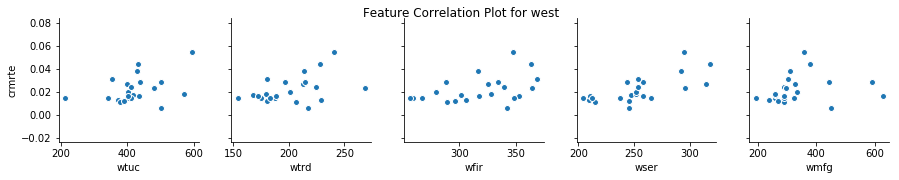

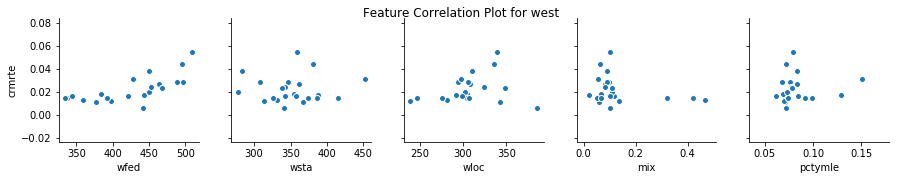

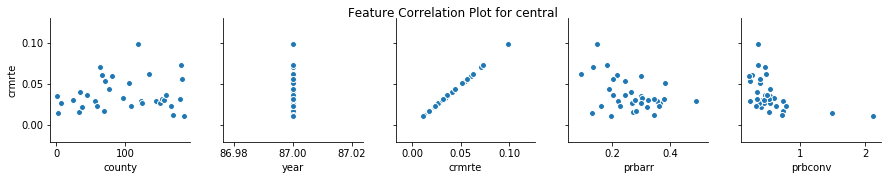

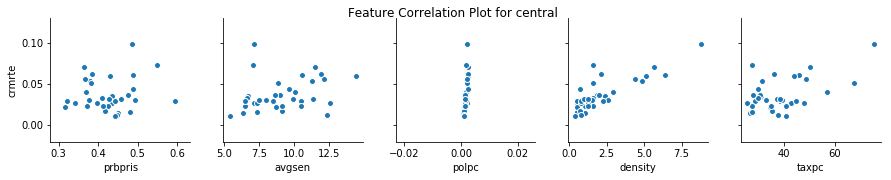

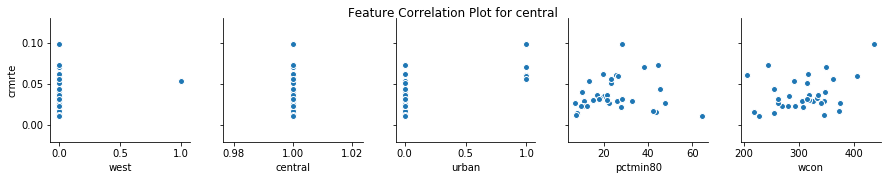

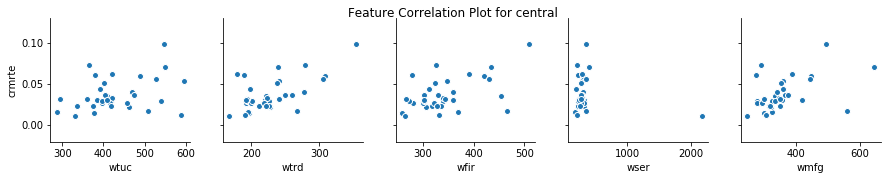

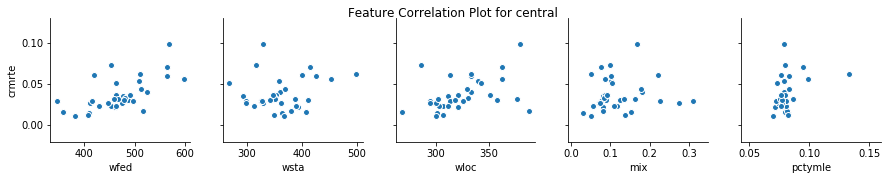

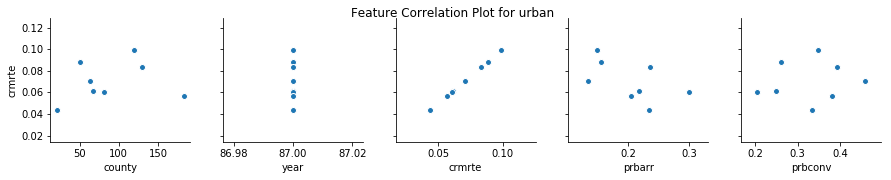

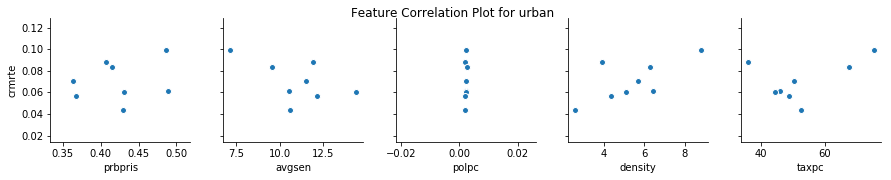

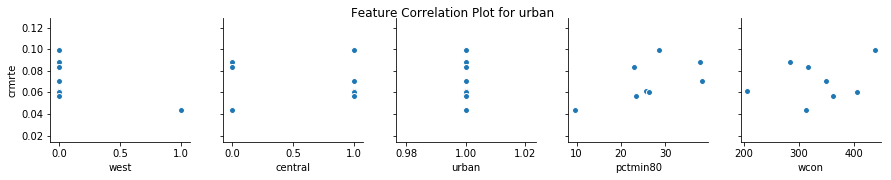

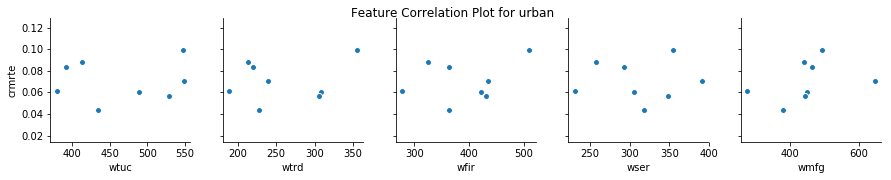

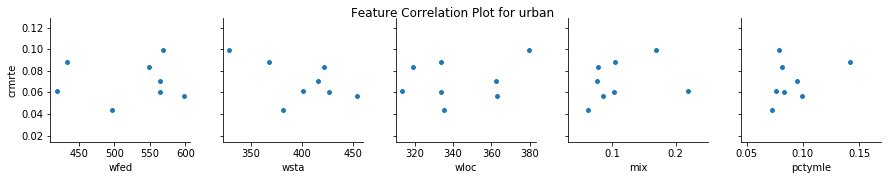

In [48]:
# To plot the correlation of boolean features against crime rate

# Categories: west, central and urban
categories = ['west', 'central', 'urban']

for category in categories:
    
    categoricalCrime = crimeData[crimeData[category] == 1]
    print('Number of data points in category: ' + 
                          category + ' is '+ str(len(categoricalCrime)))

    for i in range(0, len(categoricalCrime.columns), 5):
        
        sns.pairplot(data=categoricalCrime,
                    x_vars=categoricalCrime.columns[i:i+5],
                    y_vars=['crmrte'])
#          plt.title('Feature Correlation Plot for ' + category, loc = 'left')
        plt.suptitle('Feature Correlation Plot for ' + category)


**Observations:**

1) Some of the correlation lines are showing upward or downward trends more than before. 

2) **Probability of conviction is found to have negative correlation with crime rate in both west and central, but not in urban areas.**

3) **Tax Per capita is found to have positive correlation with crime rate in both central and urban areas.**

4) **Percentage of minority is positively correlated with crime rate, both in west and in urban areas.**

5) Thus, a combination of density and location (urban/ west/ central) might help aid crime rate prediction.

6) However, there seems to be **not much data for 'urban areas'** to arrive at a conclusion.

## Linear Regression Fit of Strongly Correlated Features

We have a lot of features to analyse in the input dataset. So let's take the strongly correlated quantitative features from this dataset and analyse them one by one.

In [49]:
# To find out strongly correlated values with crime rate. 
# 40% is taken as the threshold beyond which we include the feature in model. 

crimeData_corr = crimeData.corr()['crmrte']
selected_features_list = crimeData_corr[
                abs(crimeData_corr) > 0.4].sort_values(ascending=False)
print("There are {} strongly correlated values with Crime Rate:\n{}".format(
                len(selected_features_list), selected_features_list))

print(list(selected_features_list.index))

There are 6 strongly correlated values with Crime Rate:
crmrte     1.000000
density    0.728963
urban      0.615602
wfed       0.486156
taxpc      0.450980
wtrd       0.410106
Name: crmrte, dtype: float64
['crmrte', 'density', 'urban', 'wfed', 'taxpc', 'wtrd']


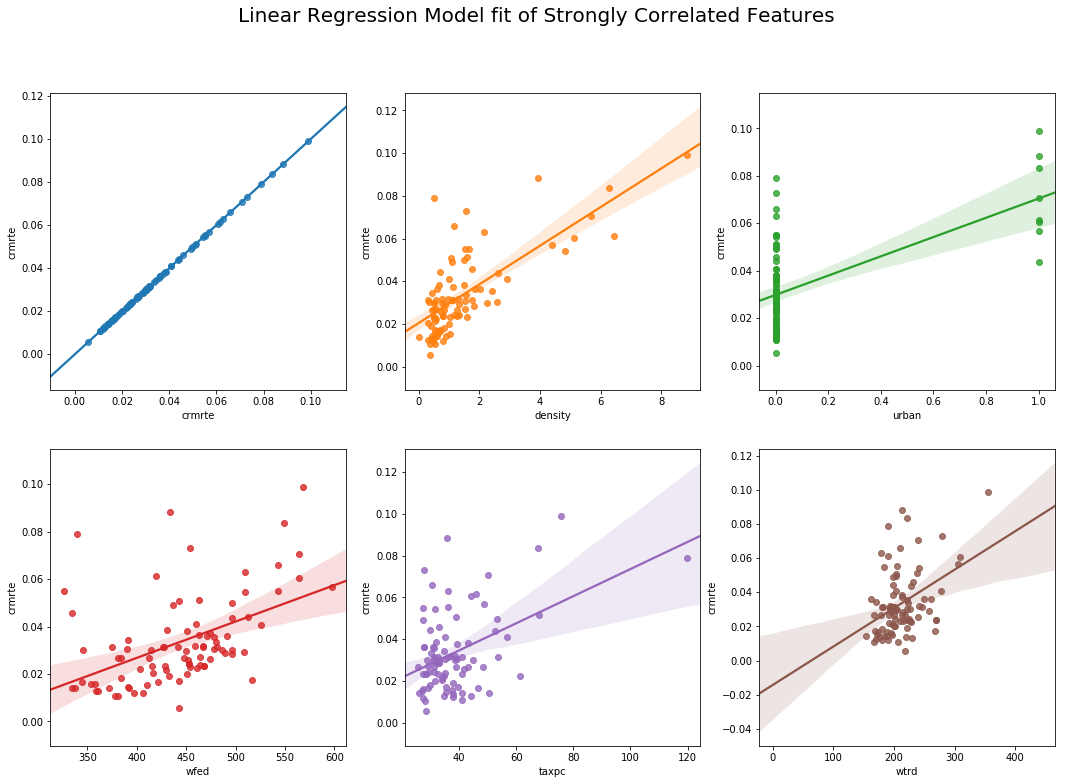

In [50]:
# To plot data and a linear regression model fit.

fig, ax = plt.subplots(round(len(selected_features_list) / 3), 3, figsize = (18, 12))

features = list(selected_features_list.index)
plt.suptitle('Linear Regression Model fit of Strongly Correlated Features', 
                                                                     fontsize=20)

for i, ax in enumerate(fig.axes):
    if i < len(features):
        sns.regplot(x=features[i],y='crmrte', 
                        data=crimeData[features], ax=ax)



## Box Plots

Let's do the box plot & violin plot for the boolean features 'west', 'central', 'urban' to find impact on crime rate, if any.

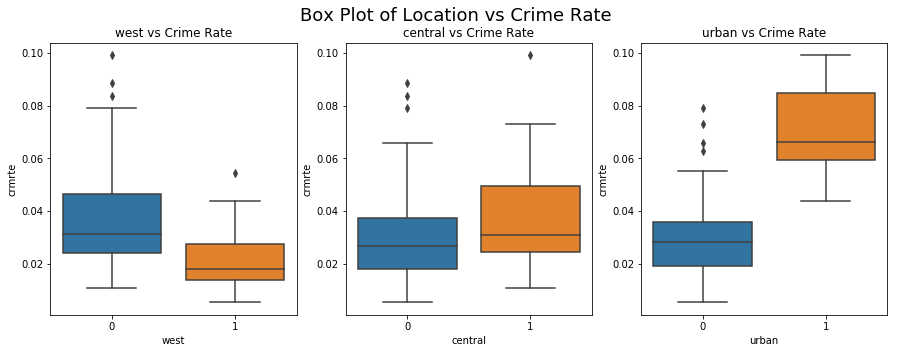

In [51]:
#Box-plot: another method of visualizing the 1-D scatter plot more intuitively.

# Categories: west, central and urban
categories = ['west', 'central', 'urban']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Box Plot of Location vs Crime Rate', fontsize=18)

for idx, cat in enumerate(categories):
    sns.boxplot(x=cat,y='crmrte', data=crimeData, 
                ax=axes[idx]).set_title(cat+' vs Crime Rate')
plt.show()

## Violin Plots

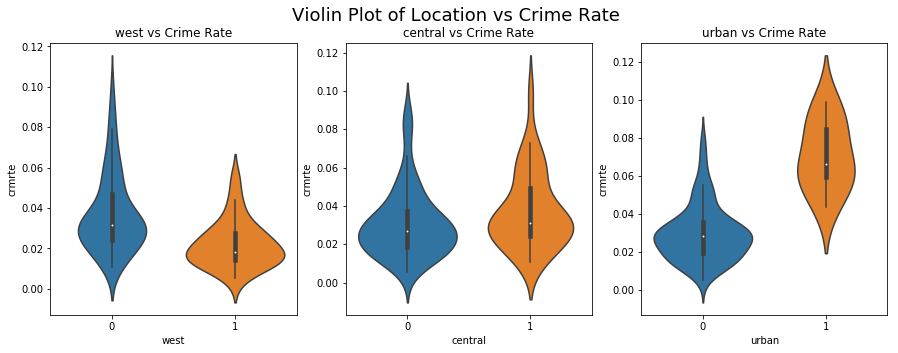

In [52]:
# A violin plot combines the benefits of the previous two plots and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Violin Plot of Location vs Crime Rate', fontsize=18)

for idx, cat in enumerate(categories):
    sns.violinplot(x=cat,y='crmrte', data=crimeData, size=8, ax=axes[idx]) \
    .set_title(cat+' vs Crime Rate')
plt.show()

**Observations:**

a) The crime rate in urban areas is found to be significantly high. Thus, the feature 'urban' is an useful variable for prediction.

b) The crime rate in west is found to be less and central moderate. But as there is significant overlap, such variations may not be very helpful for prediction. 

# Feature-Feature Correlation Analysis

Many times, more than one input could be dependent on each other. In Linear Regression, the requirement is that all the input variables are independent of each other. 

When a feature is dependent on one or more of the other input features, it leads to a phenomenon known as multi-collinearity. **Multi-collinearity among features can be identified by doing Feature-Feature correlation analysis.**

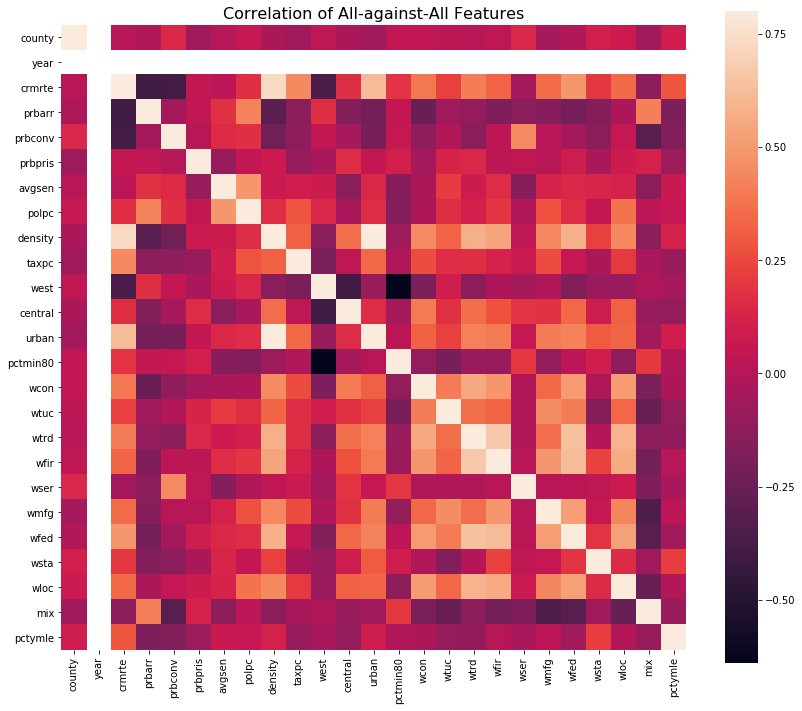

In [53]:
# Drawing a heatmap
crimeData_corr = crimeData.corr()

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of All-against-All Features',y=1,size=16)
sns.heatmap(crimeData_corr,square = True,  vmax=0.8)

**Observations from the Feature HeatMap:**
    
a) The **density and urban variable seems to be highly correlated**, which is obvious, because urban areas are densely populated.

b) **Some of the "wage features" are positively correlated**, as the wage increase/ decrease in one domain would certainly influence the other. For example, **wtrd & wfir are positively correlated to wfed & wloc. Also, wfir and wtrd have moderate correlation.**

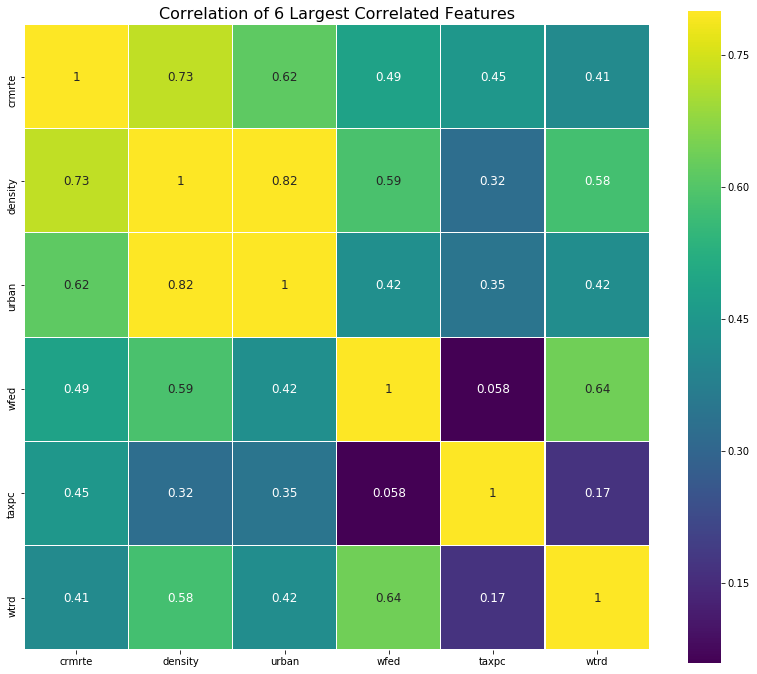

In [54]:
# Zoomed HeatMap

k= 6
cols = crimeData_corr.nlargest(k,'crmrte')['crmrte'].index
# print(cols)

cm = np.corrcoef(crimeData[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of ' + str(k) + ' Largest Correlated Features',y=1,size=16)
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,
            annot_kws = {'size':12},yticklabels = cols.values)

**Observations from Zoomed Feature HeatMap:**
    
a) Density and crime rate have a correlation of 0.73. But **density has high correlation with 'urban' feature. Hence, whether both features, density and urban, are useful to predict crime rate needs further investigation. We wll use linear regression to sort out this question.**
    
b) The feature, 'urban' has a correlation of 0.62 with crime rate, but whether the correlation is because 'urban' has very high correlation with 'density' is yet to be known.
    
c) Wage columns, wfed & wtrd are positively correlated to 'density' feature. This can be intuitively understood as the weekly wages would be higher in urban areas.

# Conclusions

## Data Analysis and Cleaning

**Observations:**

**Some rows have to be dropped** before doing regression analysis. The probability values of some rows are found to be > 1 and location of one row was found to be both 'west' and 'central', at the same time. We will drop these rows before building the model. The **special character error in the input dataset is also fixed.**


## Univariate Analysis

a) The features **density, mix, police per capita, probability of conviction and tax revenue per capita seems to have similar distribution as crime rate**. But no definitive conclusion can be made from this observation. 

b) One **strange observation is in weekly wages of service industry (wser).** More than 95% of wages lies below 400, but the maximum wage is around 2250.

From the data, this is identified to be **county 185**. As the percentage of minorities in this county is high (nearly 65%) and wages in other sectors are comparatively less, the wages of service industry is mostly an error. We will remove **"county 185"** from the input data.

c) Though the maximum value of tax revenue per capita is 120, more than 50% of values lies below 40.

d) Though the maximum value of police per capita is 0.009, more than 60% of values lies below 0.001.

## Bivariate Analysis

a) Based on the pairplot, it can be noted that **density is most positively correlated with crime rate. There is also some correlation with weekly wages under different domains but it needs further investigation, as they are not so pronounced.**

b) Strangely, the **weekly wage features and crime rate is found to be slightly positively correlated. This signifies unequal distribution of income** or probability high unemployment rate. One of the most important features that is not in the given data is unemployment rate.

## Correlation among features for each boolean feature

1) Some of the correlation lines are showing upward or downward trends more than before.

2) **Probability of conviction is found to have negative correlation with crime rate in both west and central, but not in urban areas**.

3) **Tax Per capita is found to have positive correlation with crime rate in both central and urban areas**.

4) **Percentage of minority is positively correlated with crime rate, both in west and in urban areas**.

5) Thus, a combination of density and location (urban/ west/ central) can help aid crime rate prediction.

6) However, there seems to be **not much data for 'urban areas'** to arrive at a conclusion.

## Linear Fit of Top Correlated Features

a) The crime rate in urban areas is found to be significantly high. Thus, the feature 'urban' is an useful variable for prediction.

b) The crime rate in west is found to be less and central moderate. But as there is significant overlap, such variations may not to be very helpful for prediction.

## Feature-Feature Correlation Analysis

a) Many times, more than one input could be dependent on each other. It leads to a phenomenon known as **multi-collinearity, which can be identified by doing Feature-Feature correlation analysis.** In Linear Regression, the requirement is that all the input variables are independent of each other.

b) The **density and urban variable seems to be highly correlated**, which is obvious, because urban areas are densely populated.

c) **Some of the "wage features" are positively correlated**, as the wage increase/ decrease in one domain would certainly influence the other. For example, **wtrd & wfir are positively correlated to wfed & wloc. Also, wfir and wtrd have moderate correlation**.

d) Density and crime rate have a correlation of 0.73. But **density has high correlation with 'urban' feature. Hence, whether both features, density and urban, are useful to predict crime rate needs further investigation. We wll use linear regression to sort out this question**.

e) The feature, 'urban' has a correlation of 0.62 with crime rate, but whether the correlation is because 'urban' has very high correlation with 'density' is yet to be known.

f) Wage columns, wfed & wtrd are positively correlated to 'density' feature. This can be intuitively understood as the weekly wages would be higher in urban areas.

**The above observations from EDA are carried forward to help Linear Regression (Part II).**